# Welcome to the first SimpleITK Notebook demo:
# SimpleITK Image Basics

This document will give a brief orientation to the SimpleITK Image class.

First we import the SimpleITK Python module. By convention our module is imported into the shorter and more Pythonic "sitk" local name.


In [4]:
from __future__ import print_function

import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk

#from __future__ import print_function

## Image Construction

There are a variety of ways to create an image. All images' initial value is well defined as zero.

In [5]:
image = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,128], sitk.sitkVectorUInt8, 3)

### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's. It has a value of -1.

The 64-bit integer types are not available on all distributions. When not available the value is `sitkUnknown`.


### More Information about the Image class be obtained in the Docstring


SimpleITK classes and functions have the Docstrings derived from the C++ definitions and the Doxygen documentation. 

In [6]:
help(image)

Help on Image in module SimpleITK.SimpleITK object:

class Image(builtins.object)
 |  The main Image class for SimpleITK.
 |  
 |  C++ includes: sitkImage.h
 |  
 |  Methods defined here:
 |  
 |  CopyInformation(self, srcImage)
 |      CopyInformation(Image self, Image srcImage)
 |      
 |      
 |      
 |      Copy common meta-data from an image to this one.
 |      
 |      
 |      Copies the Origin, Spacing, and Direction from the source image to
 |      this image. The meta-data dictionary is not copied.
 |      
 |      It is required for the source Image's dimension and size to match, this image's attributes, otherwise an
 |      exception will be generated.
 |  
 |  EraseMetaData(self, key)
 |      EraseMetaData(Image self, std::string const & key) -> bool
 |      
 |      
 |      
 |      Remove an entry from the meta-data dictionary.
 |      
 |      
 |      Returns true, when the value exists in the dictionary and is removed,
 |      false otherwise.
 |  
 |  GetDepth(s

## Accessing Attributes

If you are familiar with ITK, then these methods will follow your expectations:

In [7]:
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())
print(image.GetNumberOfComponentsPerPixel())

(256, 128, 64)
(0.0, 0.0, 0.0)
(1.0, 1.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1


Note: The starting index of a SimpleITK Image is always 0. If the output of an ITK filter has non-zero starting index, then the index will be set to 0, and the origin adjusted accordingly.

The size of the image's dimensions have explicit accessors:

In [8]:
print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())

256
128
64


Since the dimension  and pixel type of a SimpleITK image is determined at run-time accessors are needed. 

In [9]:
print(image.GetDimension())
print(image.GetPixelIDValue())
print(image.GetPixelIDTypeAsString())

3
2
16-bit signed integer


What is the depth of a 2D image?

In [10]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

(32, 32)
0


What is the dimension and size of a Vector image?

In [11]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())

2
(128, 128)


In [12]:
print(image_RGB.GetNumberOfComponentsPerPixel())

3


For certain file types such as DICOM, additional information about the image is contained in the meta-data dictionary.

In [13]:
for key in image.GetMetaDataKeys():
        print("\"{0}\":\"{1}\"".format(key, image.GetMetaData(key)))

## Accessing Pixels

There are the member functions ``GetPixel`` and ``SetPixel`` which provides an ITK-like interface for pixel access.

In [14]:
help(image.GetPixel)

Help on method GetPixel in module SimpleITK.SimpleITK:

GetPixel(*idx) method of SimpleITK.SimpleITK.Image instance
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.



In [15]:
print(image.GetPixel(0, 0, 0))
image.SetPixel(0, 0, 0, 1)
print(image.GetPixel(0, 0, 0))

0
1


In [16]:
print(image[0,0,0])
image[0,0,0] = 10
print(image[0,0,0])

1
10


## Conversion between numpy and SimpleITK

In [17]:
nda = sitk.GetArrayFromImage(image)
print(nda)

[[[10  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]


In [18]:
help(sitk.GetArrayFromImage)

Help on function GetArrayFromImage in module SimpleITK.SimpleITK:

GetArrayFromImage(image)
    Get a NumPy ndarray from a SimpleITK Image.
    
    This is a deep copy of the image buffer and is completely safe and without potential side effects.



In [19]:
# Get a view of the image data as a numpy array, useful for display
nda = sitk.GetArrayViewFromImage(image)

In [20]:
nda = sitk.GetArrayFromImage(image_RGB)
img = sitk.GetImageFromArray(nda)
img.GetSize()

(3, 128, 128)

In [21]:
help(sitk.GetImageFromArray)

Help on function GetImageFromArray in module SimpleITK.SimpleITK:

GetImageFromArray(arr, isVector=False)
    Get a SimpleITK Image from a numpy array. If isVector is True, then a 3D array will be treated as a 2D vector image, otherwise it will be treated as a 3D image



In [22]:
img = sitk.GetImageFromArray(nda, isVector=True)
print(img)

VectorImage (000002089067DCC0)
  RTTI typeinfo:   class itk::VectorImage<unsigned char,2>
  Reference Count: 1
  Modified Time: 803
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  VectorLength: 3
  PixelContainer: 
    ImportImageContainer (0000020890653180)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,unsigned char>
      Reference Count: 1
      Modified Time: 804
      Debug: Off
      Object Na

## The order of index and dimensions need careful attention during conversion

ITK's Image class does not have a bracket operator. It has a GetPixel which takes an ITK Index object as an argument, which is ordered as ``(x,y,z)``. This is the convention that SimpleITK's Image class uses for the GetPixel method and slicing operator as well. In numpy, an array is indexed in the **opposite** order ``(z,y,x)``. Also note that the access to channels is different. In SimpleITK you do not access the channel directly, rather the pixel value representing all channels for the specific pixel is returned and you then access the channel for that pixel. In the numpy array you are accessing the channel directly. 

In [23]:
import numpy as np

multi_channel_3Dimage = sitk.Image([2,4,8], sitk.sitkVectorFloat32, 5)
x = multi_channel_3Dimage.GetWidth() - 1
y = multi_channel_3Dimage.GetHeight() - 1
z = multi_channel_3Dimage.GetDepth() - 1
multi_channel_3Dimage[x,y,z] = np.random.random(multi_channel_3Dimage.GetNumberOfComponentsPerPixel())

nda = sitk.GetArrayFromImage(multi_channel_3Dimage)

print("Image size: " + str(multi_channel_3Dimage.GetSize()))
print("Numpy array size: " + str(nda.shape))

# Notice the index order and channel access are different:
print("First channel value in image: " + str(multi_channel_3Dimage[x,y,z][0]))
print("First channel value in numpy array: " + str(nda[z,y,x,0]))

Image size: (2, 4, 8)
Numpy array size: (8, 4, 2, 5)
First channel value in image: 0.343580037355423
First channel value in numpy array: 0.34358004



### Are we still dealing with Image, because I haven't seen one yet...

While SimpleITK does not do visualization, it does contain a built in ``Show`` method. This function writes the image out to disk and than launches a program for visualization. By default it is configured to use ImageJ, because it is readily supports all the image types which SimpleITK has and load very quickly. However, it's easily customizable by setting environment variables.

In [24]:
sitk.Show(image)

RuntimeError: Exception thrown in SimpleITK Show: C:\d\VS14-Win64-pkg\SimpleITK\Code\IO\src\sitkShow.cxx:495:
sitk::ERROR: No appropriate executable found.

In [25]:
sitk.Show?

By converting into a numpy array, matplotlib can be used for visualization for integration into the scientific python environment.

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

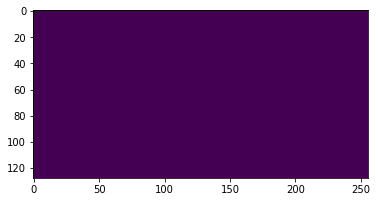

In [27]:
z = 0
slice = sitk.GetArrayViewFromImage(image)[z,:,:]
plt.imshow(slice)